In [27]:
#Importing the libraries
import pandas as pd
import numpy as np

#Importing the dataset
dataset = pd.read_csv("DataSet_JobRecommendation.csv")

#Doing Label Encoding here
from sklearn.preprocessing import LabelEncoder
def encoder(dataset):
    for col in dataset.columns:
        if dataset.dtypes[col] == "object":
            le = LabelEncoder()
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
    return dataset

newdata = encoder(dataset)
#newdata

X = newdata.iloc[:, [0,1,3,5,7,9,11,12,14,16]].values
y1 = newdata.iloc[:,17].values
y2 = newdata.iloc[:,18].values
y3 = newdata.iloc[:,19].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.25, random_state = 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.25, random_state = 0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size = 0.25, random_state = 0)

# Fitting Logistic Regression model to the Training set
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg2 = LogisticRegression()
logreg3 = LogisticRegression()
logreg1.fit(X1_train, y1_train)
logreg2.fit(X2_train, y2_train)
logreg3.fit(X3_train, y3_train)

y_pred1 = logreg1.predict(X1_test)
y_pred2 = logreg2.predict(X2_test)
y_pred3 = logreg3.predict(X3_test)

# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

# formula to calculate Accuracy
temp1 = y_pred1 - y1_test
temp2 = y_pred2 - y2_test
temp3 = y_pred3 - y3_test

#temp
# list(temp1).count(0)/len(y_pred1)*100
# list(temp2).count(0)/len(y_pred2)*100
# list(temp3).count(0)/len(y_pred3)*100

print(list(temp1).count(0)/len(y_pred1)*100)
print(list(temp2).count(0)/len(y_pred2)*100)
print(list(temp3).count(0)/len(y_pred3)*100)

C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this 

97.6
95.89999999999999
95.39999999999999


C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
set(X_train)

TypeError: unhashable type: 'numpy.ndarray'

Confusion matrix, without normalization


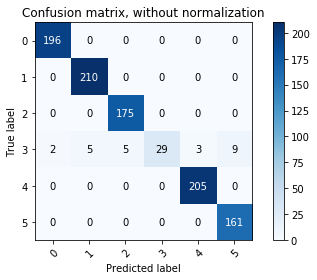

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    
    """This function prints and plots the confusion matrix.Normalization can be applied by setting `normalize=True`."""
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

   # print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=set(y_test) , title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,  title='Normalized confusion matrix')

plt.show()